In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
np.random.seed(42)

In [6]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294480 entries, 0 to 294479
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294480 non-null  int64 
 1   timestamp     294480 non-null  object
 2   group         294480 non-null  object
 3   landing_page  294480 non-null  object
 4   converted     294480 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [8]:
df.group.unique()

array(['control', 'treatment'], dtype=object)

In [9]:
df.shape[0]

294480

In [10]:
df.user_id.nunique()

290585

In [11]:
df.converted.mean()

0.1196583808747623

In [12]:
x = df.query('landing_page == "new_page" and group == "control"').count()
y = df.query('landing_page == "old_page" and group == "treatment"').count()
x+y

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

In [13]:
df.isnull().sum().any()

False

In [14]:
ind1 = df.query('landing_page == "new_page" and group == "control"').index
ind2 = df.query('landing_page == "old_page" and group == "treatment"').index
ind1, ind2

(Int64Index([    22,    240,    490,    846,    850,    988,   1198,   1354,
               1474,   1877,
             ...
             293393, 293480, 293568, 293662, 293888, 293894, 293996, 294200,
             294253, 294331],
            dtype='int64', length=1928),
 Int64Index([   308,    327,    357,    685,    713,    776,    889,   1037,
               1106,   1376,
             ...
             293240, 293302, 293391, 293443, 293530, 293773, 293817, 293917,
             294014, 294252],
            dtype='int64', length=1965))

In [15]:
# Dropping the rows where new page is not aligned with treatment
df2 = df.drop(index = ind1, axis=0)  

In [16]:
# Dropping the rows where old page is not aligned with control
df2 = df2.drop(index = ind2, axis = 0)

In [17]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group']=='control') == (df2['landing_page']=='old_page')) == False].shape[0]

0

In [18]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [19]:
df2.user_id.nunique()

290585

In [20]:
df2[df2.user_id.duplicated()].user_id

2893      773192
294478    759899
Name: user_id, dtype: int64

In [21]:
dup_id = df2[df2.user_id.duplicated()]
dup_id

,user_id,timestamp,group,landing_page,converted
2893,773192,55:59.6,treatment,new_page,0
294478,759899,20:29.0,treatment,new_page,0


In [22]:

df2.drop(index = 2893, axis = 0, inplace = True)

In [23]:
# Verifying the duplicate row has been removed
sum(df2.user_id.duplicated())

1

In [24]:

df2.converted.mean()

0.11959626410081697

In [25]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

In [26]:
df2.query('group == "treatment"').converted.mean()

0.11880643030169566

In [27]:
df2.query('landing_page == "new_page"').landing_page.count() / (df2.shape[0])

0.5000653851183471

In [28]:
df2.query('landing_page == "old_page"').landing_page.count()/ (df2.shape[0])

0.4999346148816529

In [29]:
df2.group.value_counts()

treatment    145312
control      145274
Name: group, dtype: int64

In [30]:
# Duration of the experiment  ===>> 23 days 
df2.timestamp.max(), df2.timestamp.min()

('59:59.9', '00:00.0')

In [31]:
p_new = df2.converted.mean()
p_new

0.11959626410081697

In [32]:
p_old = df2.converted.mean()
p_old

0.11959626410081697

In [33]:
# Create dataframe with all treatment records
treatment_df = df2.query('group == "treatment"') 
n_new = treatment_df.shape[0]
n_new

145312

In [34]:
# Create dataframe with all control records
control_df = df2.query('group == "control"') 
n_old = control_df.shape[0]
n_old

145274

In [35]:
new_page_converted = np.random.binomial(n_new, p_new)
new_page_converted

17257

In [36]:
old_page_converted = np.random.binomial(n_old, p_old)
old_page_converted

17474

In [37]:
p_diff = (new_page_converted/n_new) - (old_page_converted/n_old)
p_diff

-0.001524793244541564

In [38]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new, p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    p_diff = (new_page_converted/n_new) - (old_page_converted/n_old)
    p_diffs.append(p_diff)

p_diffs = np.array(p_diffs)

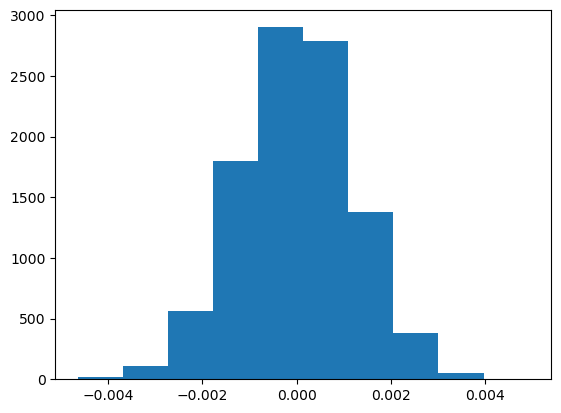

In [39]:
plt.hist(p_diffs);

In [40]:
# calculating the actual difference observed between conversion rates for new and old pages in the given dataset
control_cnv = control_df.converted.mean()
treatment_cnv = treatment_df.converted.mean()
obs_diff = treatment_cnv - control_cnv
obs_diff

-0.0015798741987655407

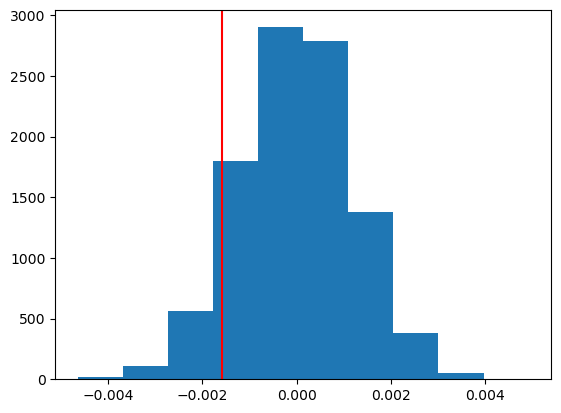

In [41]:
# plotting p_diffs distribution
plt.hist(p_diffs)

# plotting the line for the observed difference between conversion rates for new and old pages
plt.axvline(x=obs_diff,  c='red');

In [42]:
# p-value
(p_diffs > obs_diff).mean()

0.9039

In [43]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"').converted.sum()
convert_new = df2.query('landing_page == "new_page"').converted.sum()
n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145312)

In [44]:
zstat, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
zstat, p_value

(1.312290864396788, 0.9052889933017225)

In [45]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [46]:
df2['intercept'] = 1
df2[['ab_page1', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop('ab_page1', axis = 1, inplace = True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,11:48.6,control,old_page,0,1,0
1,804228,01:45.2,control,old_page,0,1,0
2,661590,55:06.2,treatment,new_page,0,1,1
3,853541,28:03.1,treatment,new_page,0,1,1
4,864975,52:26.2,control,old_page,1,1,0


In [47]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


In [48]:

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290586
Model:                          Logit   Df Residuals:                   290584
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Aug 2024   Pseudo R-squ.:               8.093e-06
Time:                        19:22:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1894
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.189      -0.037       0.007
==============================================================================
"""

In [49]:
countries_df = pd.read_csv('countries.csv')
countries_df.head()
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [50]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,26:06.5,treatment,new_page,0,1,1
630001,US,16:42.6,treatment,new_page,1,1,1
630002,US,20:56.4,control,old_page,0,1,0
630003,US,09:31.5,treatment,new_page,0,1,1
630004,US,23:58.8,treatment,new_page,0,1,1


In [51]:
df_new.country.unique()

array(['US', 'UK', 'CA'], dtype=object)

In [52]:
df_new[['Canada', 'UK', 'USA']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,Canada,UK,USA
user_id,,,,,,,,,,
630000,US,26:06.5,treatment,new_page,0,1,1,0,0,1
630001,US,16:42.6,treatment,new_page,1,1,1,0,0,1
630002,US,20:56.4,control,old_page,0,1,0,0,0,1
630003,US,09:31.5,treatment,new_page,0,1,1,0,0,1
630004,US,23:58.8,treatment,new_page,0,1,1,0,0,1


In [53]:
logit = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'USA']])
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290588
Model:                          Logit   Df Residuals:                   290585
Method:                           MLE   Df Model:                            2
Date:                Tue, 06 Aug 2024   Pseudo R-squ.:               1.521e-05
Time:                        19:23:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
USA            0.0408      0.027      1.517      0.129      -0.012       0.093
==============================================================================
"""

In [54]:
### Creating the necessary interaction column
df_new['interaction'] = df_new['ab_page'] * df_new['USA']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,Canada,UK,USA,interaction
user_id,,,,,,,,,,,
630000,US,26:06.5,treatment,new_page,0,1,1,0,0,1,1
630001,US,16:42.6,treatment,new_page,1,1,1,0,0,1,1
630002,US,20:56.4,control,old_page,0,1,0,0,0,1,0
630003,US,09:31.5,treatment,new_page,0,1,1,0,0,1,1
630004,US,23:58.8,treatment,new_page,0,1,1,0,0,1,1


In [55]:
### Fit Your Linear Model And Obtain the Results
logit_new = sm.Logit(df_new['converted'], df_new[['intercept', 'interaction']])
results = logit_new.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290588
Model:                          Logit   Df Residuals:                   290586
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Aug 2024   Pseudo R-squ.:               9.028e-06
Time:                        19:23:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1658
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9905      0.007   -281.174      0.000      -2.004      -1.977
interaction    -0.0166      0.012     -1.385      0.166      -0.040       0.007
===============================================================================
"""

# Conclusions
As per the results of all the three parts namely probability, A/B tests and regression we recommend the company to keep the old page and eliminating the need of running the experiment longer considering the current relatively long duration of 23 days. However, if we analyse the different aspects of the time and evaluate their impact on the difference between the conversion rates of old and new pages and if the influence exists, then it would be recommended to run the experiment longer to make their final decision.